In [1]:
import leaderbot as lb
data = lb.data.load()

#data['Y'][:, -1] = 0

# model = lb.models.BradleyTerryScaled(data)
#model = lb.models.RaoKupper(data, n_tie_factors=0)
# model = lb.models.RaoKupperScaledR(data, n_tie_factors=1)  # best KPCA with n_tie_factor=1
#model = lb.models.RaoKupperScaledRIJ(data, n_tie_factors=1)
# model = lb.models.DavidsonScaled(data, n_tie_factors=2)
#model = lb.models.DavidsonScaledR(data, n_tie_factors=1)
# model = lb.models.DavidsonScaledRIJ(data, n_tie_factors=1)

#model = lb.models.DavidsonScaled(data, n_tie_factors=1)
#model = lb.models.DavidsonFactor(data, n_cov_factors=3, n_tie_factors=3)
model = lb.models.DavidsonScaled(data, n_tie_factors=0)
# model = lb.models.Davidson(data)
#model = lb.models.RaoKupperFactor(data, n_factors=3)
model.train() #method='L-BFGS-B')

latex = False
save = False

In [2]:
import pickle
import leaderbot as lb

filename = '../benchmark/models_train_full.pkl'
# filename = '../benchmark/models_train_full_both_ties.pkl'
#filename = '../benchmark/models_train_split.pkl'
with open(filename, 'rb') as f:
    results = pickle.load(f)

models = results['models']
test_data = results['test_data']

model = models[22]

In [3]:
latex = True
save = True

In [2]:
loss_const = model.loss(return_jac=False, constraint=True)
loss = model.loss(return_jac=False, constraint=False)
const = loss_const - loss
print(loss)
print(const)

1.005528024279038
1.1561163359985471e-08


In [3]:
import numpy as np
n = model.n_agents
k = model.n_cov_factors
t = model.n_tie_factors
M = model.param[n * (2):n * (2 + k)].reshape(n, k)

print(k)
print(t)
print(np.sum(M, axis=0))

AttributeError: 'DavidsonScaled' object has no attribute 'n_cov_factors'

In [4]:
M

NameError: name 'M' is not defined

+---------------------------+--------+--------+---------------+---------------+
|                           |        |    num |   observed    |   predicted   |
| rnk  agent                |  score |  match | win loss  tie | win loss  tie |
+---------------------------+--------+--------+---------------+---------------+
|   1. chatgpt-4o-latest    | +0.141 |  10599 | 53%  23%  24% | 53%  23%  24% | 
|   2. gemini-1.5-pro-ex... | +0.135 |  13749 | 51%  26%  23% | 51%  26%  23% | 
|   3. gpt-4o-2024-05-13    | +0.127 |  61251 | 51%  26%  23% | 51%  26%  23% | 
|   4. gpt-4o-mini-2024-... | +0.123 |  12177 | 46%  29%  25% | 46%  29%  25% | 
|   5. claude-3-5-sonnet... | +0.123 |  37641 | 47%  30%  22% | 47%  30%  22% | 
|   6. gemini-advanced-0514 | +0.121 |  44241 | 49%  29%  22% | 49%  29%  22% | 
|   7. llama-3.1-405b-in... | +0.119 |  11967 | 46%  31%  23% | 46%  31%  23% | 
|   8. gpt-4o-2024-08-06    | +0.118 |   6758 | 44%  31%  25% | 44%  31%  25% | 
|   9. gemini-1.5-pro-ap... | +0

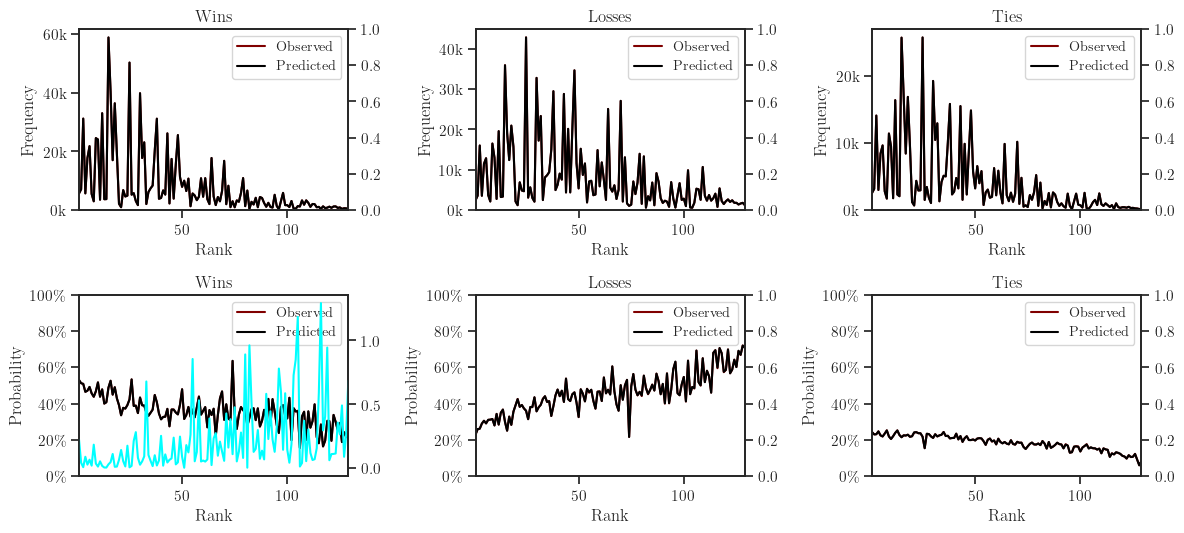

In [5]:
model.leaderboard(max_rank=None, plot=True, latex=latex, save=save)

In [4]:
%matplotlib tk
#%matplotlib inline
model.visualize(max_rank=40, method='kpca', dim='3d', latex=latex, save=save)

Plot saved to "/home/sia/work/github/arenaranking/notebooks/visualization.svg".
Plot saved to "/home/sia/work/github/arenaranking/notebooks/visualization.pdf".


In [31]:
# %matplotlib tk
model.plot_scores(max_rank=50, horizontal=False, latex=latex, save=save)

Plot saved to "/home/sia/work/github/arenaranking/notebooks/scores.svg".
Plot saved to "/home/sia/work/github/arenaranking/notebooks/scores.pdf".


Plot saved to "/home/sia/work/github/arenaranking/notebooks/match_matrix.svg".
Plot saved to "/home/sia/work/github/arenaranking/notebooks/match_matrix.pdf".


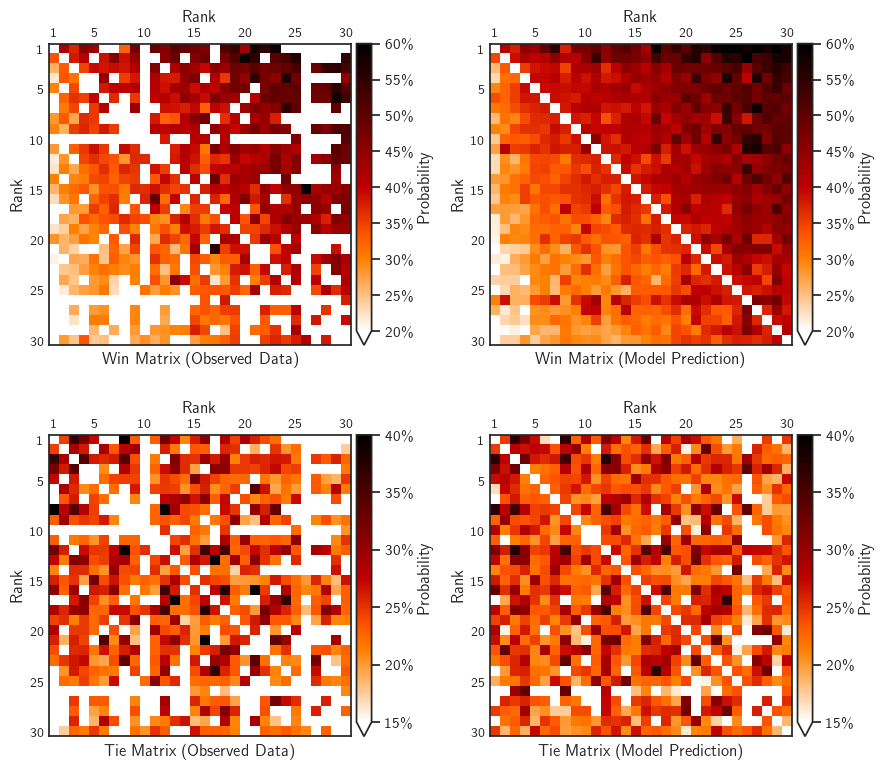

In [8]:
model.match_matrix(max_rank=30, density=True, source='both',
                   latex=latex, save=save, horizontal=False,
                   win_range=[0.2, 0.6], tie_range=[0.15, 0.4])

Plot saved to "/home/sia/work/github/arenaranking/notebooks/match_matrix.svg".
Plot saved to "/home/sia/work/github/arenaranking/notebooks/match_matrix.pdf".


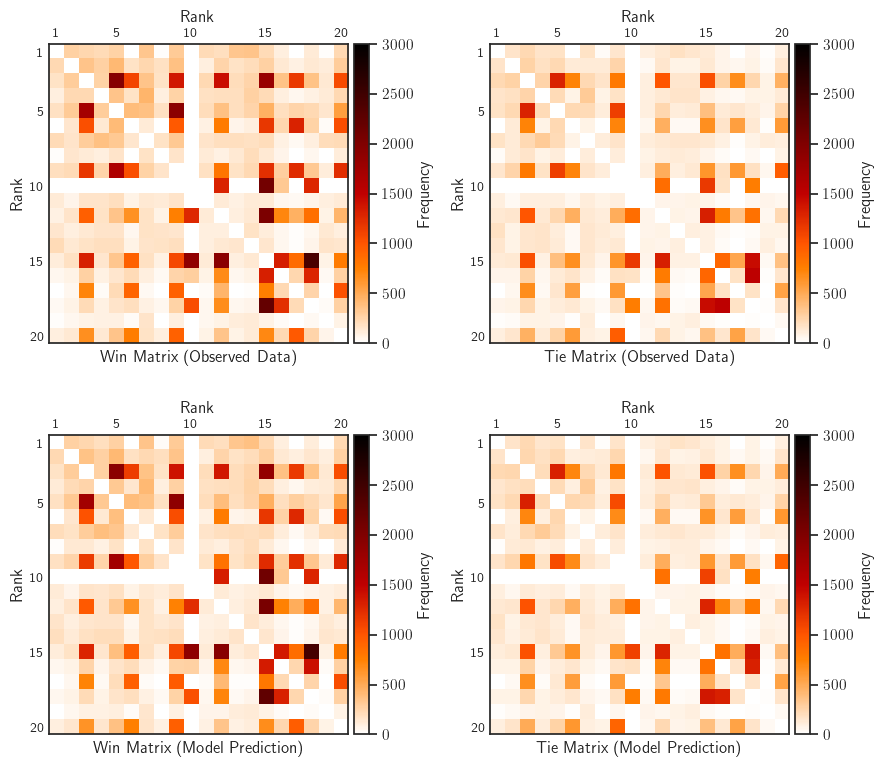

In [11]:
model.match_matrix(max_rank=20, density=False, source='both',
                   latex=latex, save=save, horizontal=True,
                   win_range=[0, 3000], tie_range=[0, 1500])

In [11]:
y = data['Y']

a = y.sum()
b = y.sum(axis=0)

print(b[-1] / a)

0.2044522311337633
